Dataset loaded successfully.

# Task 1: Extract Latest Year (2022)

Unique years: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)] 

Records for 2022: 206

# Task 2: Data Exploration

     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              An

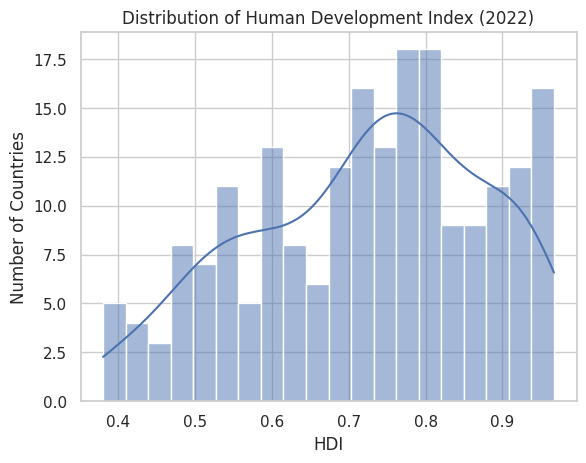

Insight: Majority of countries fall in the Medium to High HDI range, with fewer countries at very low or very high HDI levels.


In [ ]:
#Mohammad_Sahid_Rain_2463004
# 5CS037 – Assignment 01
# Problem 1A: Single Year HDI Exploration (2022)
# Dataset: Human_Development_Index_Dataset.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
try:
    df = pd.read_csv(
        "/content/drive/MyDrive/Human_Development_Index_Dataset.csv",
        encoding="latin1",
        engine="python"
    )
    print("Dataset loaded successfully.\n")
except Exception as e:
    print("Error loading dataset:", e)
    exit()

# Task 1: Extract Latest Year (2022)
print("# Task 1: Extract Latest Year (2022)\n")

unique_years = sorted(df["year"].unique())
print("Unique years:", unique_years, "\n")

hdi_2022_df = df[df["year"] == 2022].copy()
print(f"Records for 2022: {hdi_2022_df.shape[0]}\n")

# Task 2: Data Exploration
print("# Task 2: Data Exploration\n")

print(hdi_2022_df.head(10), "\n")
print(f"Rows: {hdi_2022_df.shape[0]}, Columns: {hdi_2022_df.shape[1]}\n")
print(hdi_2022_df.dtypes, "\n")

# Task 3: Missing Values & Data Cleaning
print("# Task 3: Missing Values & Data Cleaning\n")
print("Missing values per column:")
print(hdi_2022_df.isna().sum(), "\n")

hdi_2022_df.replace(["–", "-", "…"], np.nan, inplace=True)
numeric_columns = [
    "hdi",
    "life_expectancy",
    "expec_yr_school",
    "mean_yr_school",
    "gross_inc_percap"
]

for col in numeric_columns:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors="coerce")

# Remove duplicates
duplicates_before = hdi_2022_df.duplicated().sum()
hdi_2022_df.drop_duplicates(inplace=True)
print(f"Duplicate rows removed: {duplicates_before}\n")

# Handle missing critical values
hdi_2022_df.dropna(
    subset=["hdi", "gross_inc_percap"],
    inplace=True
)
print("Missing critical values handled.\n")

# Task 4: Basic Statistics (WORKING)
print("# Task 4: Basic Statistics\n")

print(f"Mean HDI: {hdi_2022_df['hdi'].mean():.3f}")
print(f"Median HDI: {hdi_2022_df['hdi'].median():.3f}")
print(f"Std Dev HDI: {hdi_2022_df['hdi'].std():.3f}\n")

print("Country with Highest HDI:")
print(hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax()][["country", "hdi"]], "\n")

print("Country with Lowest HDI:")
print(hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin()][["country", "hdi"]], "\n")

# Task 5: Filtering and Sorting
print("# Task 5: Filtering and Sorting\n")

high_hdi_df = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]

high_hdi_sorted = high_hdi_df.sort_values(
    by="gross_inc_percap",
    ascending=False
)

print(
    high_hdi_sorted[["country", "hdi", "gross_inc_percap"]].head(10),
    "\n"
)

# Task 6: HDI Category
print("# Task 6: HDI Category\n")

def classify_hdi(h):
    if h < 0.550:
        return "Low"
    elif h <= 0.699:
        return "Medium"
    elif h <= 0.799:
        return "High"
    else:
        return "Very High"

hdi_2022_df["HDI Category"] = hdi_2022_df["hdi"].apply(classify_hdi)

print(hdi_2022_df["HDI Category"].value_counts(), "\n")

# Save Output
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)
print("Saved: HDI_category_added.csv\n")

# Visualization
plt.figure()
sns.histplot(hdi_2022_df["hdi"], bins=20, kde=True)
plt.title("Distribution of Human Development Index (2022)")
plt.xlabel("HDI")
plt.ylabel("Number of Countries")
plt.show()

print(
    "Insight: Majority of countries fall in the Medium to High HDI range, "
    "with fewer countries at very low or very high HDI levels."
)


Dataset Shape: (6798, 30)
   Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_education_f_%  secondar

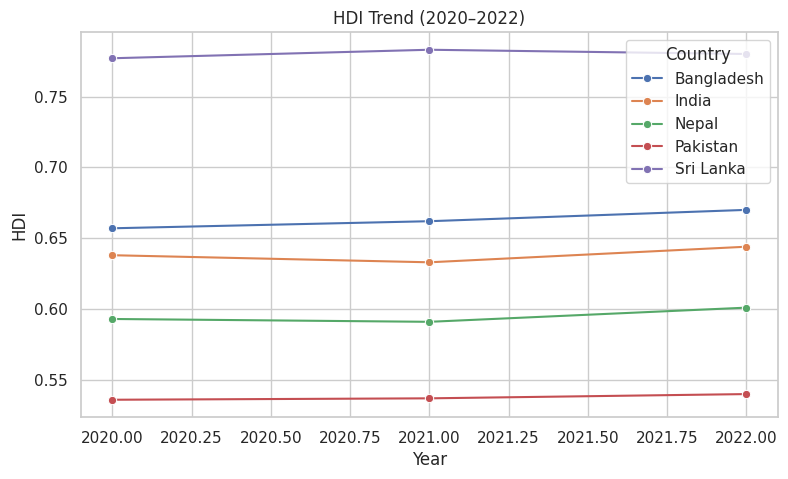

Insight: Most South Asian countries show slow recovery post-COVID.
Region column not available.


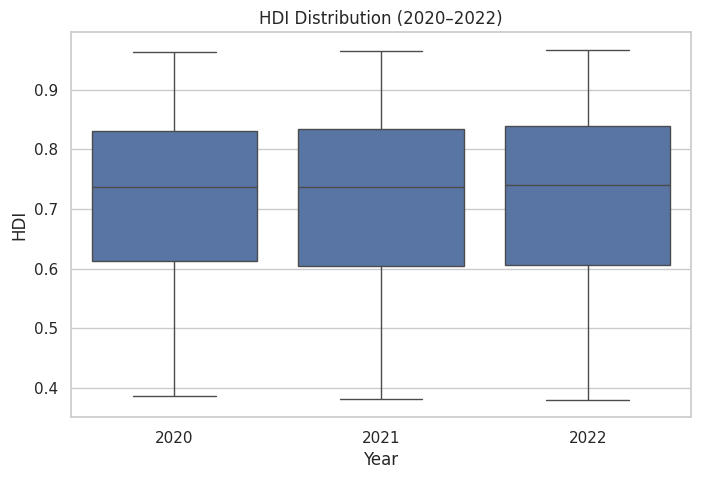

Insight: HDI median slightly declines in 2020 and recovers in 2022.


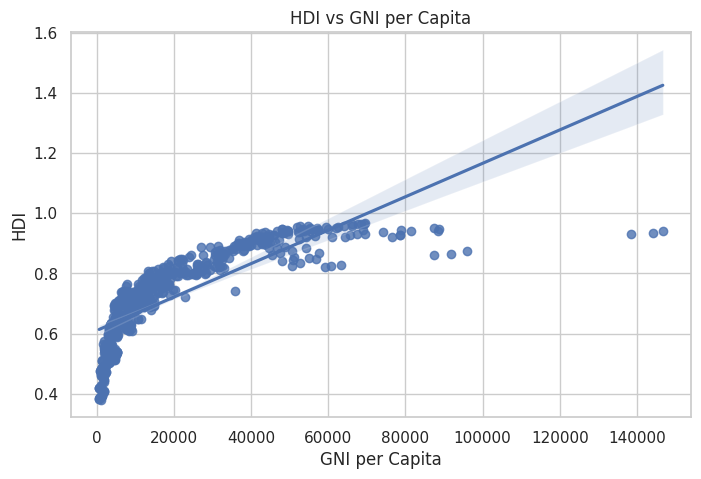

In [ ]:
# problem :1B

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

sns.set(style="whitegrid")

# TASK 1: LOAD DATASET
df = pd.read_csv('/content/drive/MyDrive/Human_Development_Index_Dataset.csv', encoding='ISO-8859-1')
print("Dataset Shape:", df.shape)
print(df.head())

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# TASK 2: FILTER YEARS (2020–2022)
hdi_2020_22 = df[df['year'].isin([2020, 2021, 2022])].copy()
hdi_2020_22.to_csv('HDI_problem1B.csv', index=False)

print("\nFiltered Dataset Shape:", hdi_2020_22.shape)
print(hdi_2020_22[['country', 'year', 'hdi']].head())

# TASK 3: DATA CLEANING
print("\nMissing Values:")
print(hdi_2020_22[['country', 'year', 'hdi']].isnull().sum())


hdi_2020_22.dropna(subset=['country', 'hdi', 'year'], inplace=True)
hdi_2020_22.drop_duplicates(inplace=True)

numeric_cols = ['hdi', 'gross_inc_percap', 'life_expectancy']
for col in numeric_cols:
    hdi_2020_22[col] = pd.to_numeric(hdi_2020_22[col], errors='coerce')

print("\nData cleaned successfully.")

# TASK 4A: LINE CHART – HDI TREND (5 COUNTRIES)
countries = ['Nepal', 'India', 'Bangladesh', 'Pakistan', 'Sri Lanka']
subset = hdi_2020_22[hdi_2020_22['country'].isin(countries)]

plt.figure(figsize=(9,5))
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend(title="Country")
plt.show()
print("Insight: Most South Asian countries show slow recovery post-COVID.")

# TASK 4B-1: BAR CHART – AVERAGE HDI BY REGION
if 'region' in hdi_2020_22.columns:
    region_avg = hdi_2020_22.groupby(['region', 'year'])['hdi'].mean().reset_index()

    plt.figure(figsize=(10,5))
    sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
    plt.title("Average HDI by Region (2020–2022)")
    plt.xlabel("Region")
    plt.ylabel("Average HDI")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Region column not available.")

# TASK 4B-2: BOX PLOT – HDI DISTRIBUTION
plt.figure(figsize=(8,5))
sns.boxplot(data=hdi_2020_22, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

print("Insight: HDI median slightly declines in 2020 and recovers in 2022.")

# TASK 4B-3: SCATTER – HDI vs GNI
if 'gross_inc_percap' in hdi_2020_22.columns:
    plt.figure(figsize=(8,5))
    sns.regplot(data=hdi_2020_22, x='gross_inc_percap', y='hdi')
    plt.title("HDI vs GNI per Capita")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.show()
else:
    print("GNI per Capita variable not available.")


Dataset Loaded Successfully
Shape: (6798, 30)
   unnamed:_0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_edu

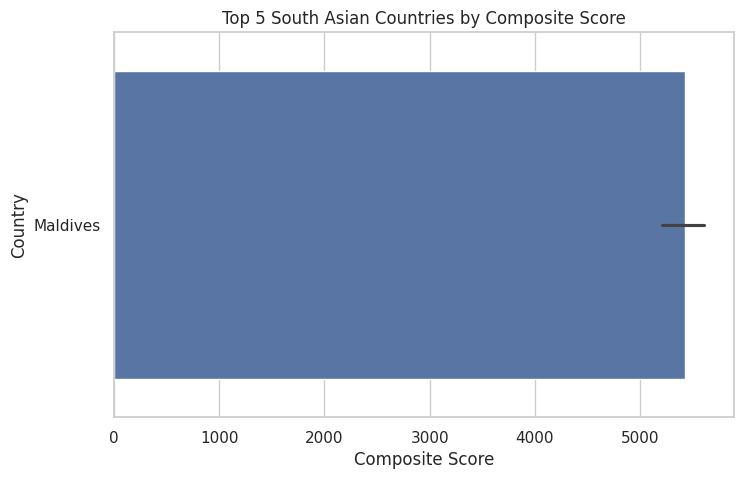


Comparison of Composite Rank vs HDI Rank:
          country  composite_rank  hdi_rank
3530     Maldives             1.0       8.0
3527     Maldives             2.0      11.5
3526     Maldives             3.0      14.5
3525     Maldives             4.0      17.0
3524     Maldives             5.0      20.0
...           ...             ...       ...
8     Afghanistan           235.0     232.0
4     Afghanistan           236.0     236.0
9     Afghanistan           237.0     230.0
10    Afghanistan           238.0     229.0
11    Afghanistan           239.0     228.0

[239 rows x 3 columns]


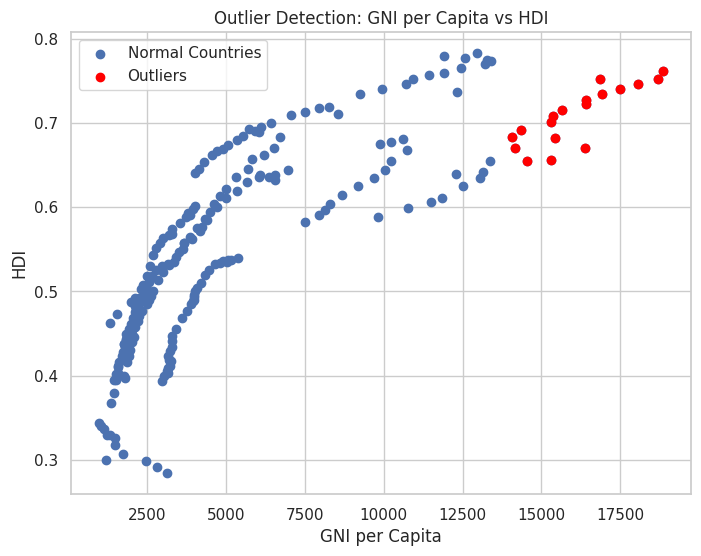


HDI Outliers:
Series([], Name: hdi, dtype: float64)

GNI per Capita Outliers:
3511    14543.14634
3512    15287.20714
3514    16391.40757
3515    14162.42816
3516    15423.81910
3517    14050.92438
3518    14363.23615
3519    15300.31364
3520    15355.44089
3521    15648.36655
3522    16410.16419
3523    16414.93039
3524    16911.45422
3525    17474.64201
3526    18055.72465
3527    18679.92536
3529    16857.60546
3530    18846.79219
Name: gross_inc_percap, dtype: float64


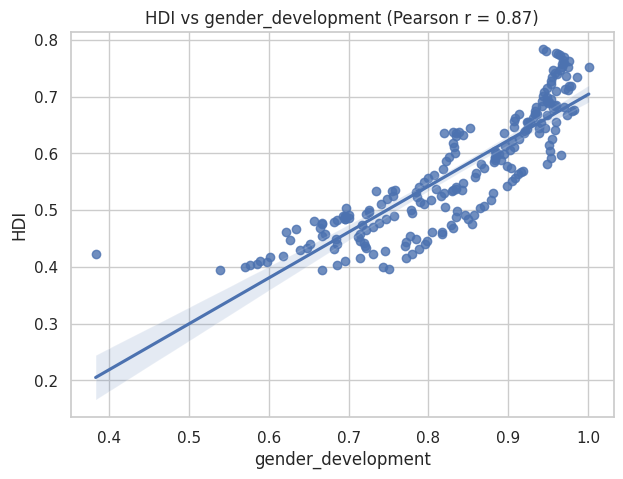

Pearson Correlation between HDI and gender_development: 0.866


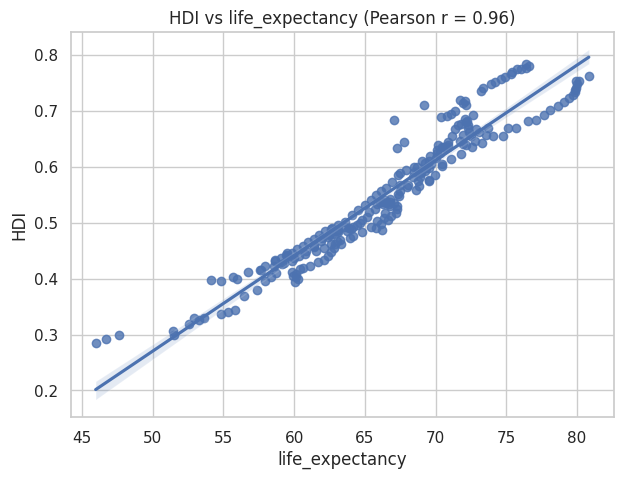

Pearson Correlation between HDI and life_expectancy: 0.959


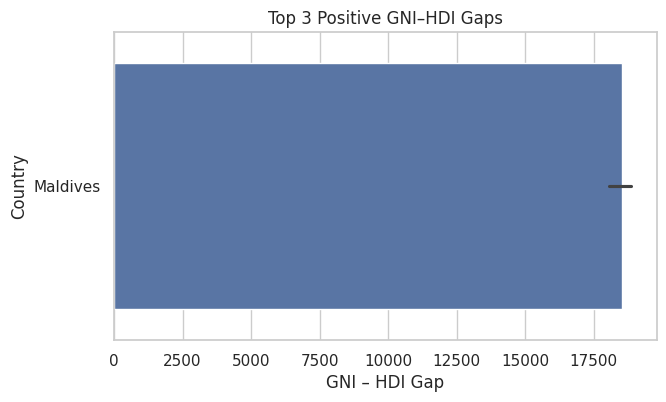

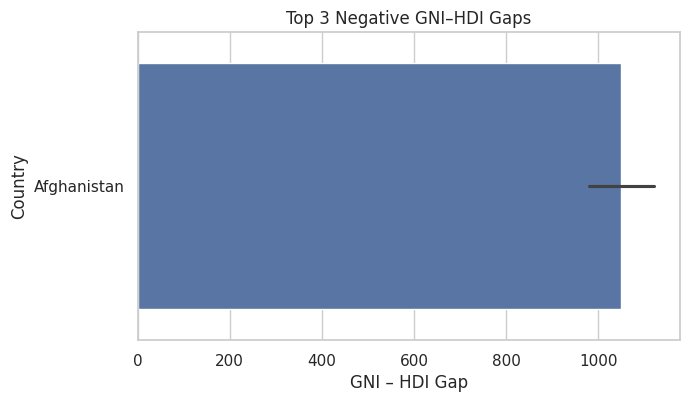


Top 3 Positive Gaps:
       country  gni_hdi_gap
3530  Maldives  18846.03019
3527  Maldives  18679.17236
3526  Maldives  18054.97765

Top 3 Negative Gaps:
        country  gni_hdi_gap
11  Afghanistan   980.789554
10  Afghanistan  1047.002686
9   Afghanistan  1121.985570


In [ ]:
# IMPORT REQUIRED LIBRARIES
# problem : 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

sns.set(style="whitegrid")

# LOAD DATASET
df = pd.read_csv('/content/drive/MyDrive/Human_Development_Index_Dataset.csv', encoding='ISO-8859-1')

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print(df.head())

# TASK 1: CREATE SOUTH ASIA SUBSET
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia_df = df[df['country'].isin(south_asia_countries)].copy()

# Save file
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)

print("\nSouth Asia Dataset Created")
print("Shape:", south_asia_df.shape)
print(south_asia_df[['country', 'hdi']].head())

# TASK 2: COMPOSITE DEVELOPMENT SCORE
# Formula (AS GIVEN IN QUESTION):
# Composite Score = 0.30 × Life Expectancy + 0.30 × GNI per Capita
cols_required = ['life_expectancy', 'gross_inc_percap', 'hdi']
for col in cols_required:
    south_asia_df[col] = pd.to_numeric(south_asia_df[col], errors='coerce')

# Drop rows with missing essential values
south_asia_df.dropna(subset=cols_required, inplace=True)

# Composite Score calculation
south_asia_df['composite_score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
)

# Ranking
south_asia_df['composite_rank'] = south_asia_df['composite_score'].rank(ascending=False)
south_asia_df['hdi_rank'] = south_asia_df['hdi'].rank(ascending=False)

# Top 5 countries by Composite Score
top5_composite = south_asia_df.sort_values(
    by='composite_score', ascending=False
).head(5)

plt.figure(figsize=(8,5))
sns.barplot(
    data=top5_composite,
    x='composite_score',
    y='country'
)
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()

print("\nComparison of Composite Rank vs HDI Rank:")
print(south_asia_df[['country', 'composite_rank', 'hdi_rank']]
      .sort_values('composite_rank'))

# TASK 3: OUTLIER DETECTION (1.5 × IQR RULE)

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

hdi_outliers = detect_outliers_iqr(south_asia_df['hdi'])
gni_outliers = detect_outliers_iqr(south_asia_df['gross_inc_percap'])

plt.figure(figsize=(8,6))
plt.scatter(
    south_asia_df['gross_inc_percap'],
    south_asia_df['hdi'],
    label='Normal Countries'
)

plt.scatter(
    south_asia_df.loc[gni_outliers.index, 'gross_inc_percap'],
    south_asia_df.loc[gni_outliers.index, 'hdi'],
    color='red',
    label='Outliers'
)

plt.title("Outlier Detection: GNI per Capita vs HDI")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.show()

print("\nHDI Outliers:")
print(hdi_outliers)

print("\nGNI per Capita Outliers:")
print(gni_outliers)

# TASK 4: EXPLORING METRIC RELATIONSHIPS
# Gender Development Index
# Life Expectancy

metrics = ['gender_development', 'life_expectancy']

for metric in metrics:
    if metric in south_asia_df.columns:
        south_asia_df[metric] = pd.to_numeric(
            south_asia_df[metric], errors='coerce'
        )

        valid_data = south_asia_df[[metric, 'hdi']].dropna()

        corr, _ = pearsonr(valid_data[metric], valid_data['hdi'])

        plt.figure(figsize=(7,5))
        sns.regplot(
            data=valid_data,
            x=metric,
            y='hdi'
        )
        plt.title(f"HDI vs {metric} (Pearson r = {corr:.2f})")
        plt.xlabel(metric)
        plt.ylabel("HDI")
        plt.show()

        print(f"Pearson Correlation between HDI and {metric}: {corr:.3f}")
    else:
        print(f"{metric} column not available in dataset.")

# TASK 5: GAP ANALYSIS
# GNI HDI Gap = gross inc percap − hdi

south_asia_df['gni_hdi_gap'] = (
    south_asia_df['gross_inc_percap'] -
    south_asia_df['hdi']
)

# Top 3 positive gaps
top_positive_gap = south_asia_df.sort_values(
    by='gni_hdi_gap', ascending=False
).head(3)

plt.figure(figsize=(7,4))
sns.barplot(
    data=top_positive_gap,
    x='gni_hdi_gap',
    y='country'
)
plt.title("Top 3 Positive GNI–HDI Gaps")
plt.xlabel("GNI – HDI Gap")
plt.ylabel("Country")
plt.show()

# Top 3 negative gaps
top_negative_gap = south_asia_df.sort_values(
    by='gni_hdi_gap', ascending=True
).head(3)

plt.figure(figsize=(7,4))
sns.barplot(
    data=top_negative_gap,
    x='gni_hdi_gap',
    y='country'
)
plt.title("Top 3 Negative GNI–HDI Gaps")
plt.xlabel("GNI – HDI Gap")
plt.ylabel("Country")
plt.show()

print("\nTop 3 Positive Gaps:")
print(top_positive_gap[['country', 'gni_hdi_gap']])

print("\nTop 3 Negative Gaps:")
print(top_negative_gap[['country', 'gni_hdi_gap']])


Dataset loaded successfully
Shape: (6798, 30)
   unnamed:_0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_edu

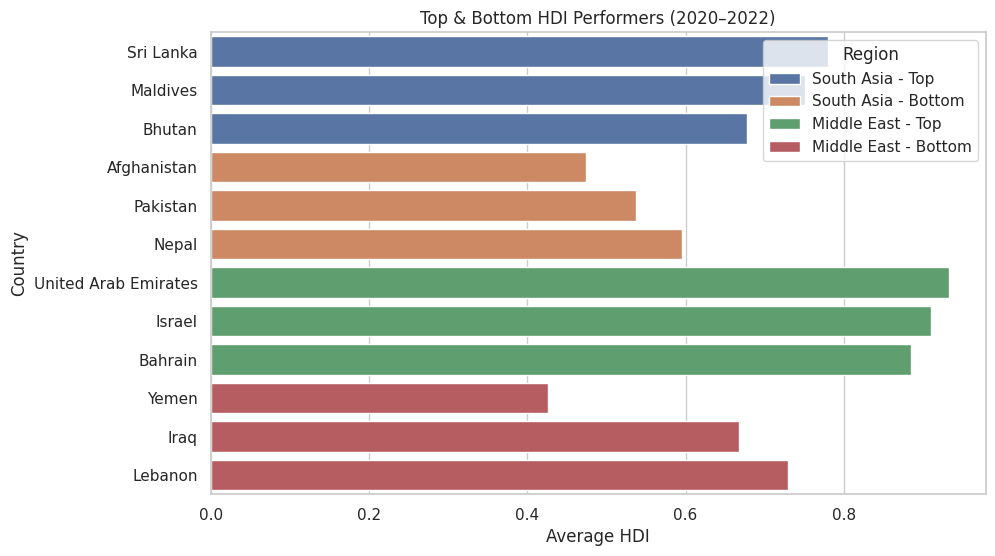

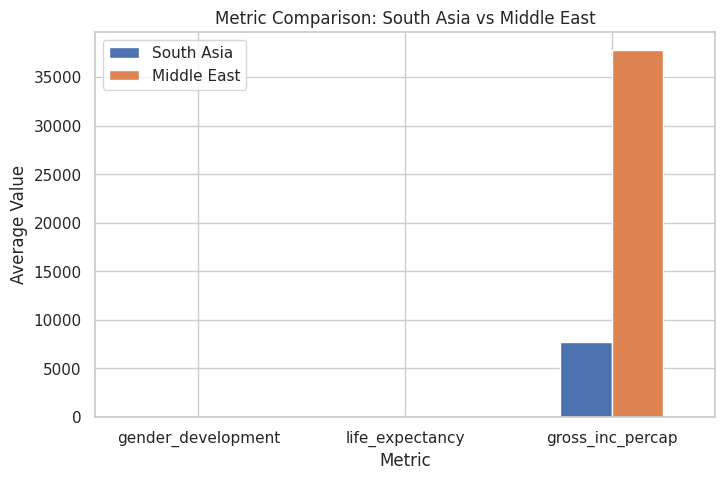


HDI Disparity Analysis:
        Region  HDI Range  Coefficient of Variation
0   South Asia      0.321                  0.153652
1  Middle East      0.513                  0.179101


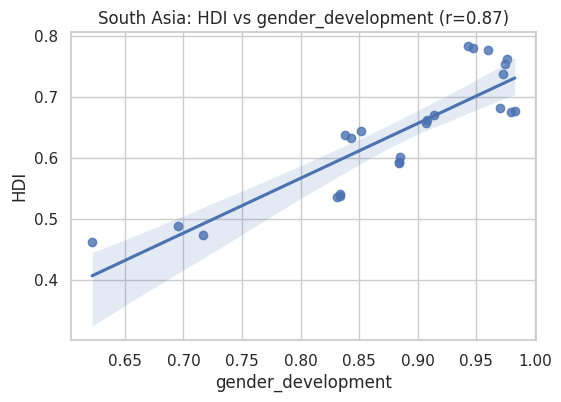

South Asia correlation between HDI and gender_development: 0.874


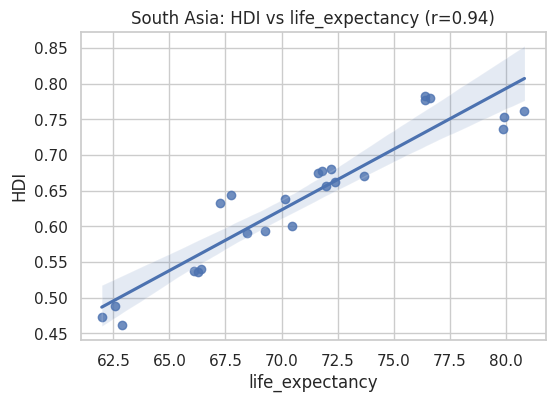

South Asia correlation between HDI and life_expectancy: 0.939


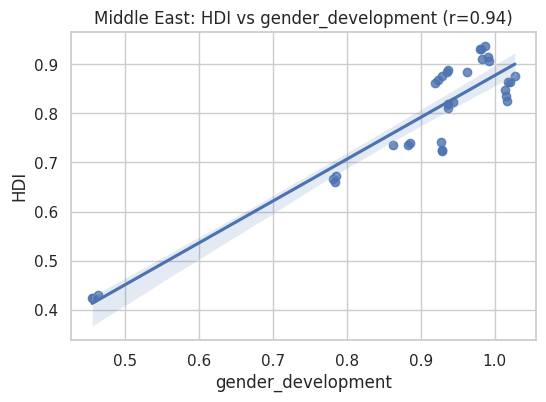

Middle East correlation between HDI and gender_development: 0.936


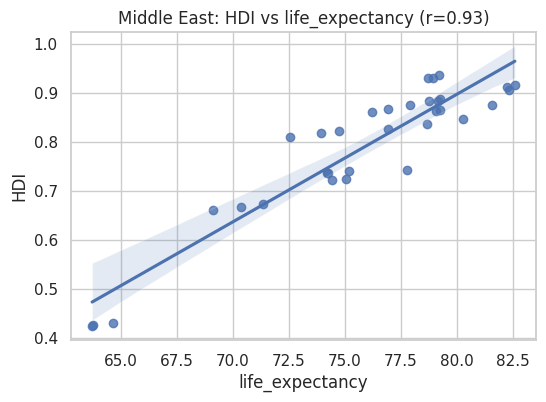

Middle East correlation between HDI and life_expectancy: 0.933


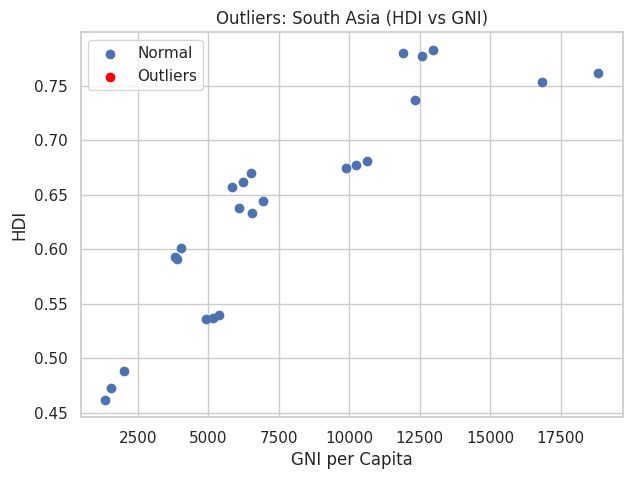

South Asia HDI Outliers:
Series([], Name: hdi, dtype: float64)


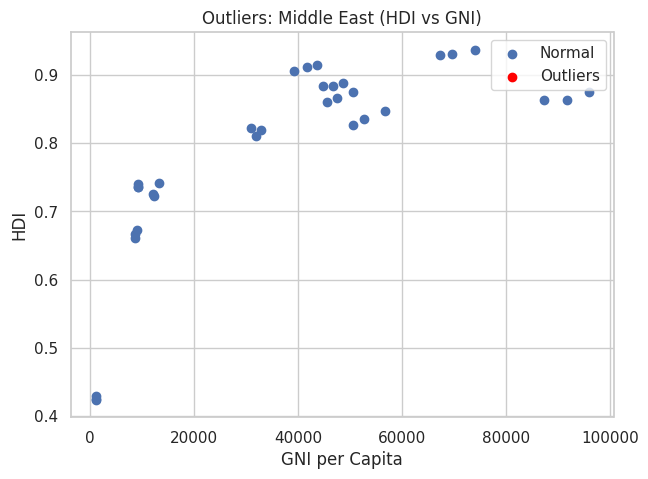

Middle East HDI Outliers:
6366    0.430
6367    0.425
6368    0.424
Name: hdi, dtype: float64


In [ ]:
# problem : 3
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(style="whitegrid")

# load dataset
df = pd.read_csv(
    "/content/drive/MyDrive/Human_Development_Index_Dataset.csv",
    encoding="ISO-8859-1"
)

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Dataset loaded successfully")
print("Shape:", df.shape)
print(df.head())

# TASK 1: FILTER DATASET (2020–2022)
df_2020_2022 = df[df["year"].isin([2020, 2021, 2022])].copy()
df_2020_2022.replace(["–", "-", "…"], np.nan, inplace=True)

numeric_cols = [
    "hdi",
    "life_expectancy",
    "gross_inc_percap",
    "gender_development"
]

for col in numeric_cols:
    if col in df_2020_2022.columns:
        df_2020_2022[col] = pd.to_numeric(df_2020_2022[col], errors="coerce")

df_2020_2022.dropna(subset=["country", "year", "hdi"], inplace=True)
df_2020_2022.drop_duplicates(inplace=True)
df_2020_2022.to_csv("HDI_problem1B.csv", index=False)

# TASK 1: CREATE REGIONAL SUBSETS
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

south_asia_df = df_2020_2022[df_2020_2022["country"].isin(south_asia)].copy()
middle_east_df = df_2020_2022[df_2020_2022["country"].isin(middle_east)].copy()

south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

print("Regional datasets saved successfully")

# TASK 2: DESCRIPTIVE STATISTICS
stats = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Mean HDI": [
        south_asia_df["hdi"].mean(),
        middle_east_df["hdi"].mean()
    ],
    "Std Dev HDI": [
        south_asia_df["hdi"].std(),
        middle_east_df["hdi"].std()
    ]
})

print("\nDescriptive Statistics (2020–2022):")
print(stats)

# TASK 3: TOP & BOTTOM PERFORMERS
def top_bottom(df):
    avg = df.groupby("country")["hdi"].mean().reset_index()
    return avg.nlargest(3, "hdi"), avg.nsmallest(3, "hdi")

sa_top, sa_bottom = top_bottom(south_asia_df)
me_top, me_bottom = top_bottom(middle_east_df)

combined = pd.concat([
    sa_top.assign(Region="South Asia - Top"),
    sa_bottom.assign(Region="South Asia - Bottom"),
    me_top.assign(Region="Middle East - Top"),
    me_bottom.assign(Region="Middle East - Bottom")
])

plt.figure(figsize=(10,6))
sns.barplot(data=combined, x="hdi", y="country", hue="Region")
plt.title("Top & Bottom HDI Performers (2020–2022)")
plt.xlabel("Average HDI")
plt.ylabel("Country")
plt.show()

# TASK 4: METRIC COMPARISON
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

metric_means = pd.DataFrame({
    "Metric": metrics,
    "South Asia": [south_asia_df[m].mean() for m in metrics],
    "Middle East": [middle_east_df[m].mean() for m in metrics]
})

metric_means.set_index("Metric").plot(
    kind="bar",
    figsize=(8,5)
)
plt.title("Metric Comparison: South Asia vs Middle East")
plt.ylabel("Average Value")
plt.xlabel("Metric")
plt.xticks(rotation=0)
plt.show()

# TASK 5: HDI DISPARITY
def hdi_variation(df):
    mean = df["hdi"].mean()
    std = df["hdi"].std()
    hdi_range = df["hdi"].max() - df["hdi"].min()
    cv = std / mean
    return mean, std, hdi_range, cv

sa_stats = hdi_variation(south_asia_df)
me_stats = hdi_variation(middle_east_df)

variation_df = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "HDI Range": [sa_stats[2], me_stats[2]],
    "Coefficient of Variation": [sa_stats[3], me_stats[3]]
})

print("\nHDI Disparity Analysis:")
print(variation_df)

# TASK 6: CORRELATION ANALYSIS
def correlation_plot(df, region):
    for metric in ["gender_development", "life_expectancy"]:
        clean = df[[metric, "hdi"]].dropna()
        corr, _ = pearsonr(clean[metric], clean["hdi"])

        plt.figure(figsize=(6,4))
        sns.regplot(data=clean, x=metric, y="hdi")
        plt.title(f"{region}: HDI vs {metric} (r={corr:.2f})")
        plt.xlabel(metric)
        plt.ylabel("HDI")
        plt.show()

        print(f"{region} correlation between HDI and {metric}: {corr:.3f}")

correlation_plot(south_asia_df, "South Asia")
correlation_plot(middle_east_df, "Middle East")

# TASK 7: OUTLIER DETECTION (1.5 × IQR)
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series[(series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)]

def outlier_plot(df, region):
    hdi_out = detect_outliers(df["hdi"])
    gni_out = detect_outliers(df["gross_inc_percap"])

    plt.figure(figsize=(7,5))
    plt.scatter(df["gross_inc_percap"], df["hdi"], label="Normal")
    plt.scatter(
        df.loc[gni_out.index, "gross_inc_percap"],
        df.loc[gni_out.index, "hdi"],
        color="red", label="Outliers"
    )
    plt.title(f"Outliers: {region} (HDI vs GNI)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.legend()
    plt.show()

    print(f"{region} HDI Outliers:")
    print(hdi_out)

outlier_plot(south_asia_df, "South Asia")
outlier_plot(middle_east_df, "Middle East")
